# Import Libraries and Data

In [1]:
import pandas as pd # dataframe/data cleaning/manipulation
import numpy as np
from matplotlib import pyplot as plt # plotting/graphing
import seaborn as sns # additional visualizations
import matplotlib.patches as mpatches
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text # Decision tree algorithm and plotting functions for the Decision tree
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.metrics import accuracy_score # accuracy metric
import warnings # error supression

Note: If you are using Google Colab, you must upload the two training and single testing CSVs from Canvas by doing the following:

* On the left-side bar, click the folder icon.
* Click the 'Upload to session storage' button.
* Upload the three CSV files; they will appear below the 'sample_data' folder.

**Unfortunately, this process must be done every time the runtime is disconnected - just a quirk with Google Colab.**

If you are using Jupyter notebook, just make sure the training and testings CSV files are in the same folder location as this .ipynb file.

In [2]:
training_df_non_binarized = pd.read_csv('training_data_non_binarized.csv',index_col=0)
training_df = pd.read_csv('training_data.csv',index_col=0)
testing_df = pd.read_csv('testing_data.csv',index_col=0)

# This object will be used to create visualizations later.
meta = [('age', 'NUMERIC'),
 ('sex', ['FEMALE', 'MALE']),
 ('region', ['INNER_CITY', 'TOWN', 'RURAL', 'SUBURBAN']),
 ('income', 'NUMERIC'),
 ('married', ['NO', 'YES']),
 ('children', 'NUMERIC'),
 ('car', ['NO', 'YES']),
 ('save_act', ['NO', 'YES']),
 ('current_act', ['NO', 'YES']),
 ('mortgage', ['NO', 'YES']),
 ('pep', ['YES', 'NO'])]

# Visualize Data and Attributes

The data set we are working with is a British Bank Dataset with ~ 600 records. We are aiming to predict whether or not someone will buy a personal equity plan (PEP) based on other data such as age, sex, region, and income.

Notice that the categorical varibles, such as sex and region, have been converted to dummy variables in our training and testing dataframes shown below. This is necessary as Scikit-Learn can only work with numeric values and True/False (or 0 and 1) values. The method to do this with a Pandas dataframe is [pd.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

**Optional:** You can practice using [pd.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) on `training_df_non_binarized`, which is the original training data before the categorical variables were binarized, and save the results to `training_df`.

In [3]:
# Show first 5 rows of the training dataframe

training_df.head()

,age,income,married,children,car,save_act,current_act,mortgage,pep,sex_FEMALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN
0,48.0,17546.0,False,1.0,False,False,False,False,True,1,1,0,0,0
1,40.0,30085.1,True,3.0,True,False,True,True,False,0,0,0,0,1
2,51.0,16575.4,True,0.0,True,True,True,False,False,1,1,0,0,0
3,23.0,20375.4,True,3.0,False,False,True,False,False,1,0,0,0,1
4,57.0,50576.3,True,0.0,False,True,False,False,False,1,0,1,0,0


In [4]:
# Show first 5 rows of the testing dataframe

testing_df.head()

,age,income,married,children,car,save_act,current_act,mortgage,pep,sex_FEMALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN
0,23.0,18766.90,True,0.0,True,True,False,True,True,0,1,0,0,0
1,30.0,9915.67,False,1.0,False,True,False,True,False,0,0,1,0,0
2,45.0,21881.60,False,0.0,True,True,True,False,True,1,0,1,0,0
3,50.0,46794.40,True,2.0,False,True,False,True,False,0,0,0,0,1
4,41.0,20721.10,True,0.0,True,True,True,False,False,1,1,0,0,0


The function display_attribute() created below is designed to create a comparative bar chart, specifically comparing the distribution of the 'PEP' (Personal Equity Plan) and 'No PEP' attributes.

**You do not need to understand how the function works; mainly focus on the outputs below.**

In [5]:
def display_attribute(df, meta, col_name, bins=8):
    # We define the function to have four parameters, a df, the attributes, the column name to be visualized,
    # and an optional parameter specifying the number of bins
    col_val = [item[0] for item in meta]
    pep = df.loc[df['pep'] == True]
    pep_col_name = []
    no_pep_col_name = []

    # col_val extracts attribute names from the metadata
    # pep creates a new dataframe containing only the rows where 'pep' is true
    # pep_col_name and no_pep_col_name are empty lists for later use

    if type(meta[col_val.index(col_name)][1]) == list:
        labels = meta[col_val.index(col_name)][1]
        for label in labels:
            no_pep_col_name.append(len(df.loc[df[col_name] == label]))
            pep_col_name.append(len(pep.loc[pep[col_name] == label]))
        # Essentially, what the above code is doing is checking to see if the attribute specified
        # by col_name is categorical (checking if the entry is a list), and if so, the function will
        # count the # of occurrences of each category in the PEP and NO PEP groups, and are stored in the
        # empty lists instantiated earlier.

    else:
        labels = []
        min_val = int(min(df[col_name]))
        max_val = int(max(df[col_name]))
        rg = max_val - min_val
        if rg < 12:
            for x in range(min_val, max_val + 1):
                no_pep_col_name.append(len(df.loc[df[col_name] == x]))
                pep_col_name.append(len(pep.loc[pep[col_name] == x]))
                labels.append(x)
        else:
            for y in range(min_val, max_val, (rg//bins)):
                no_pep_col_name.append(len(df.loc[df[col_name].between(y, y + (rg//8))]))
                pep_col_name.append(len(pep.loc[pep[col_name].between(y, y + (rg//8))]))
                labels.append(f"{y}-{y+(rg//8-1)}")
        # If the attribute is numerical, the above code executes instead. Here, the function is checking
        # what the range of the numerical data is. If it is < 12, the function counts occurrences for each
        # individual value. Otherwise, it is divided into bins, which is predefined as 8. For each bin,
        # the function counts occurrences of values falling into the bin.

    if type(labels[0]) != str:
        labels = [str(label) for label in labels]
    # Here, the function is checking to see if the labels are not all strings, and if so, converts them
    # to strings so that it works with the plotting function.

    plt.figure(dpi = 100)
    plt.rcParams.update({'font.size': 7})
    plt.bar(labels, no_pep_col_name, label='No PEP', color='red')
    plt.bar(labels, pep_col_name, label='Yes PEP', color='blue')
    plt.legend()
    plt.title(f'{col_name} distribution')
    plt.show()
    # Lastly, the function instantiates a figure with a 100 DPI resolution, sets font size to 7,
    # generates two bar plots: one for No PEP in red and another for Yes PEP in blue, adds a legend
    # and title, and then finally displays the plot.

# In this case, nothing is output because it is all within the function.

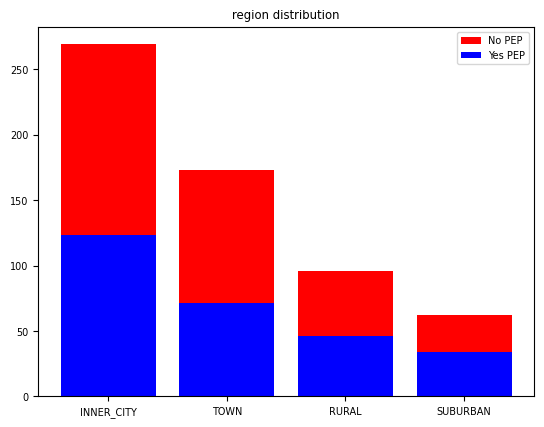

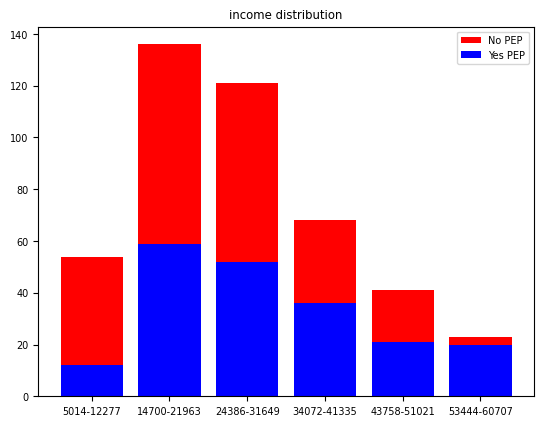

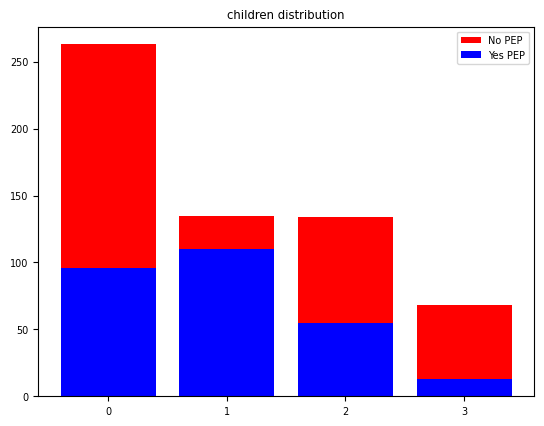

In [6]:
# We are now calling the function to produce visual outputs.
# Change the third parameter to change which attribute to display
plt.rcdefaults()

display_attribute(training_df_non_binarized, meta, "region", 10) # Distribution of region attribute split into 10 bins
display_attribute(training_df_non_binarized, meta, "income", 6) # Distribution of income attribut split into 6 bins
display_attribute(training_df_non_binarized, meta, "children", 10) # Distribution of children attribute split into 10 bins

What takeaways can we make from these plots?

The code below aims to visually explore and present the relationship between two attributes from the data based on the value of our target variable, pep, in a 2D Scatterplot.

Again, you do not need to understand how the function works; mainly focus on the outputs below.

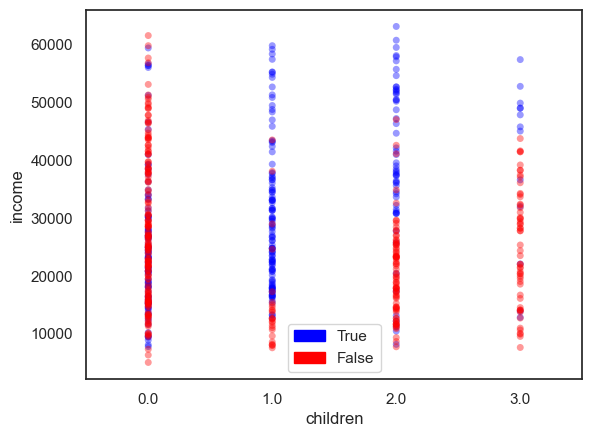

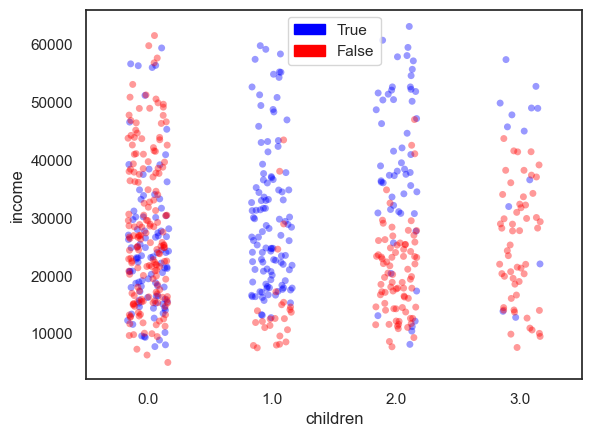

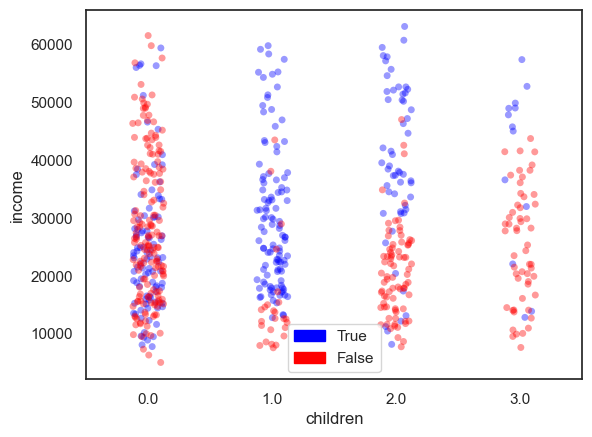

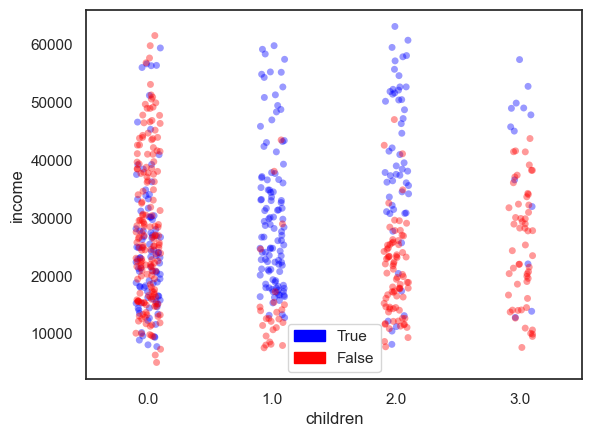

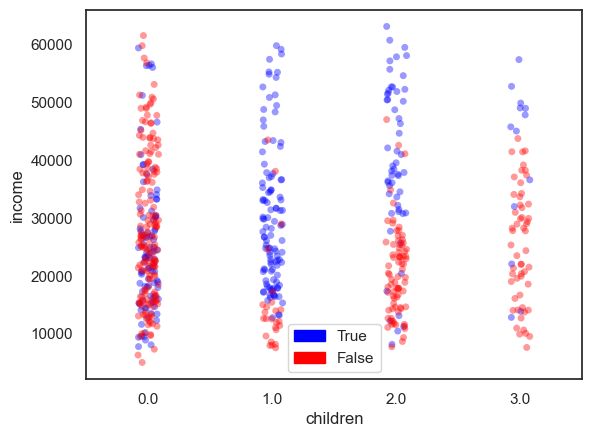

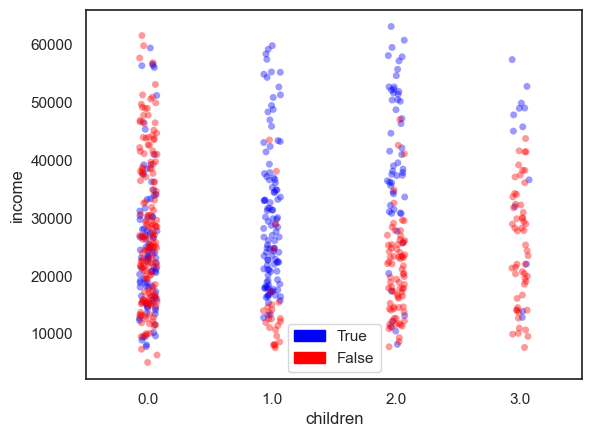

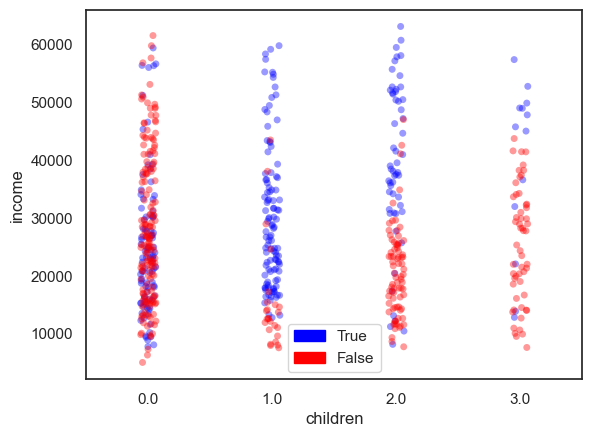

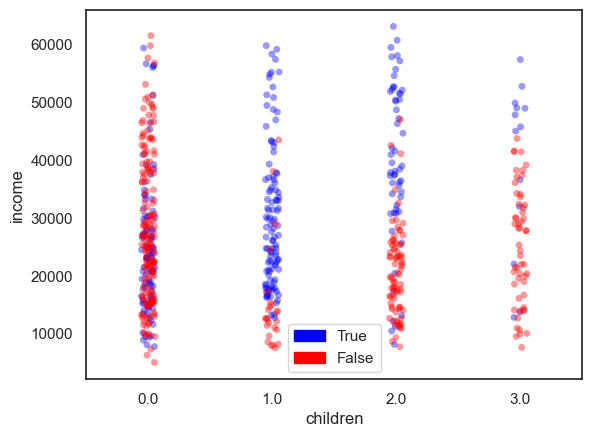

In [7]:
# This function is designed to display scatterplots of two attributes from the dataframe,
# with the points colored based on the pep attribute (True/False).

def myscatterj(df,myx,myy,jitter=False):

    # The function takes four total inputs: The dataframe, the column name of the df to be used
    # as the x axis, the column name of the df to be used as the y axis, and jitter, which if set
    # to true, adds a small amount of random noise to the vertical position of each datapoint.
    # It is set to false, but can be useful when multiple datapoints overlap. A float value
    # can also be provided to control the amount of jitter.

    onlyT=df[df['pep'] == True]
    onlyT.head() # Not needed
    onlyF=df[df['pep'] == False]
    onlyF.head() # Not needed

    # First, the code above splits the df into two based on the 'pep' attribute, one with 'pep' as true
    # and the other with 'pep' as false.

    sns.set(style="white")
    sns.stripplot(x=myx, y=myy, data=onlyT,color="blue",jitter=jitter, alpha=.40)
    sns.stripplot(x=myx, y=myy, data=onlyF,color="red",jitter=jitter, alpha=.40)

    # The above code creates two scatterplots for where pep is true and false respectively.

    pop_a = mpatches.Patch(color='blue', label='True')
    pop_b = mpatches.Patch(color='red', label='False')
    plt.legend(handles=[pop_a,pop_b])

    # Custom legend patches are created with the above code and added to the plot in the above code.

    #plt.legend(["True" , "False"])
    #sns.despine()
    plt.show() # Display the plot


myscatterj(training_df,'children','income')
for i in range(6,20,2):
    myscatterj(training_df,'children','income',1/i)

    # We call the function to visualze data from the training dataframe.
    # The for loop creates scatter plots with varying levels of jitter. Specifically, the jitter levels
    # are controlled by the fraction 1/i and the loop runs from i to 6 to 18 in steps of 2.

What takeaways can we make from these plots?

# Create Model - Decision Tree

Here, we are creating our first [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). We are training a tree classifier on the dataset and want to view the trained decision tree. By doing so, one can understand the decision-making process of the tree, see which features are most influential, and determine the paths in the tree that lead to specific classifications.

Here, the model is designed to avoid overfitting (with the `min_samples_leaf` parameter) and make splits that maximize information gain (using the entropy criterion).

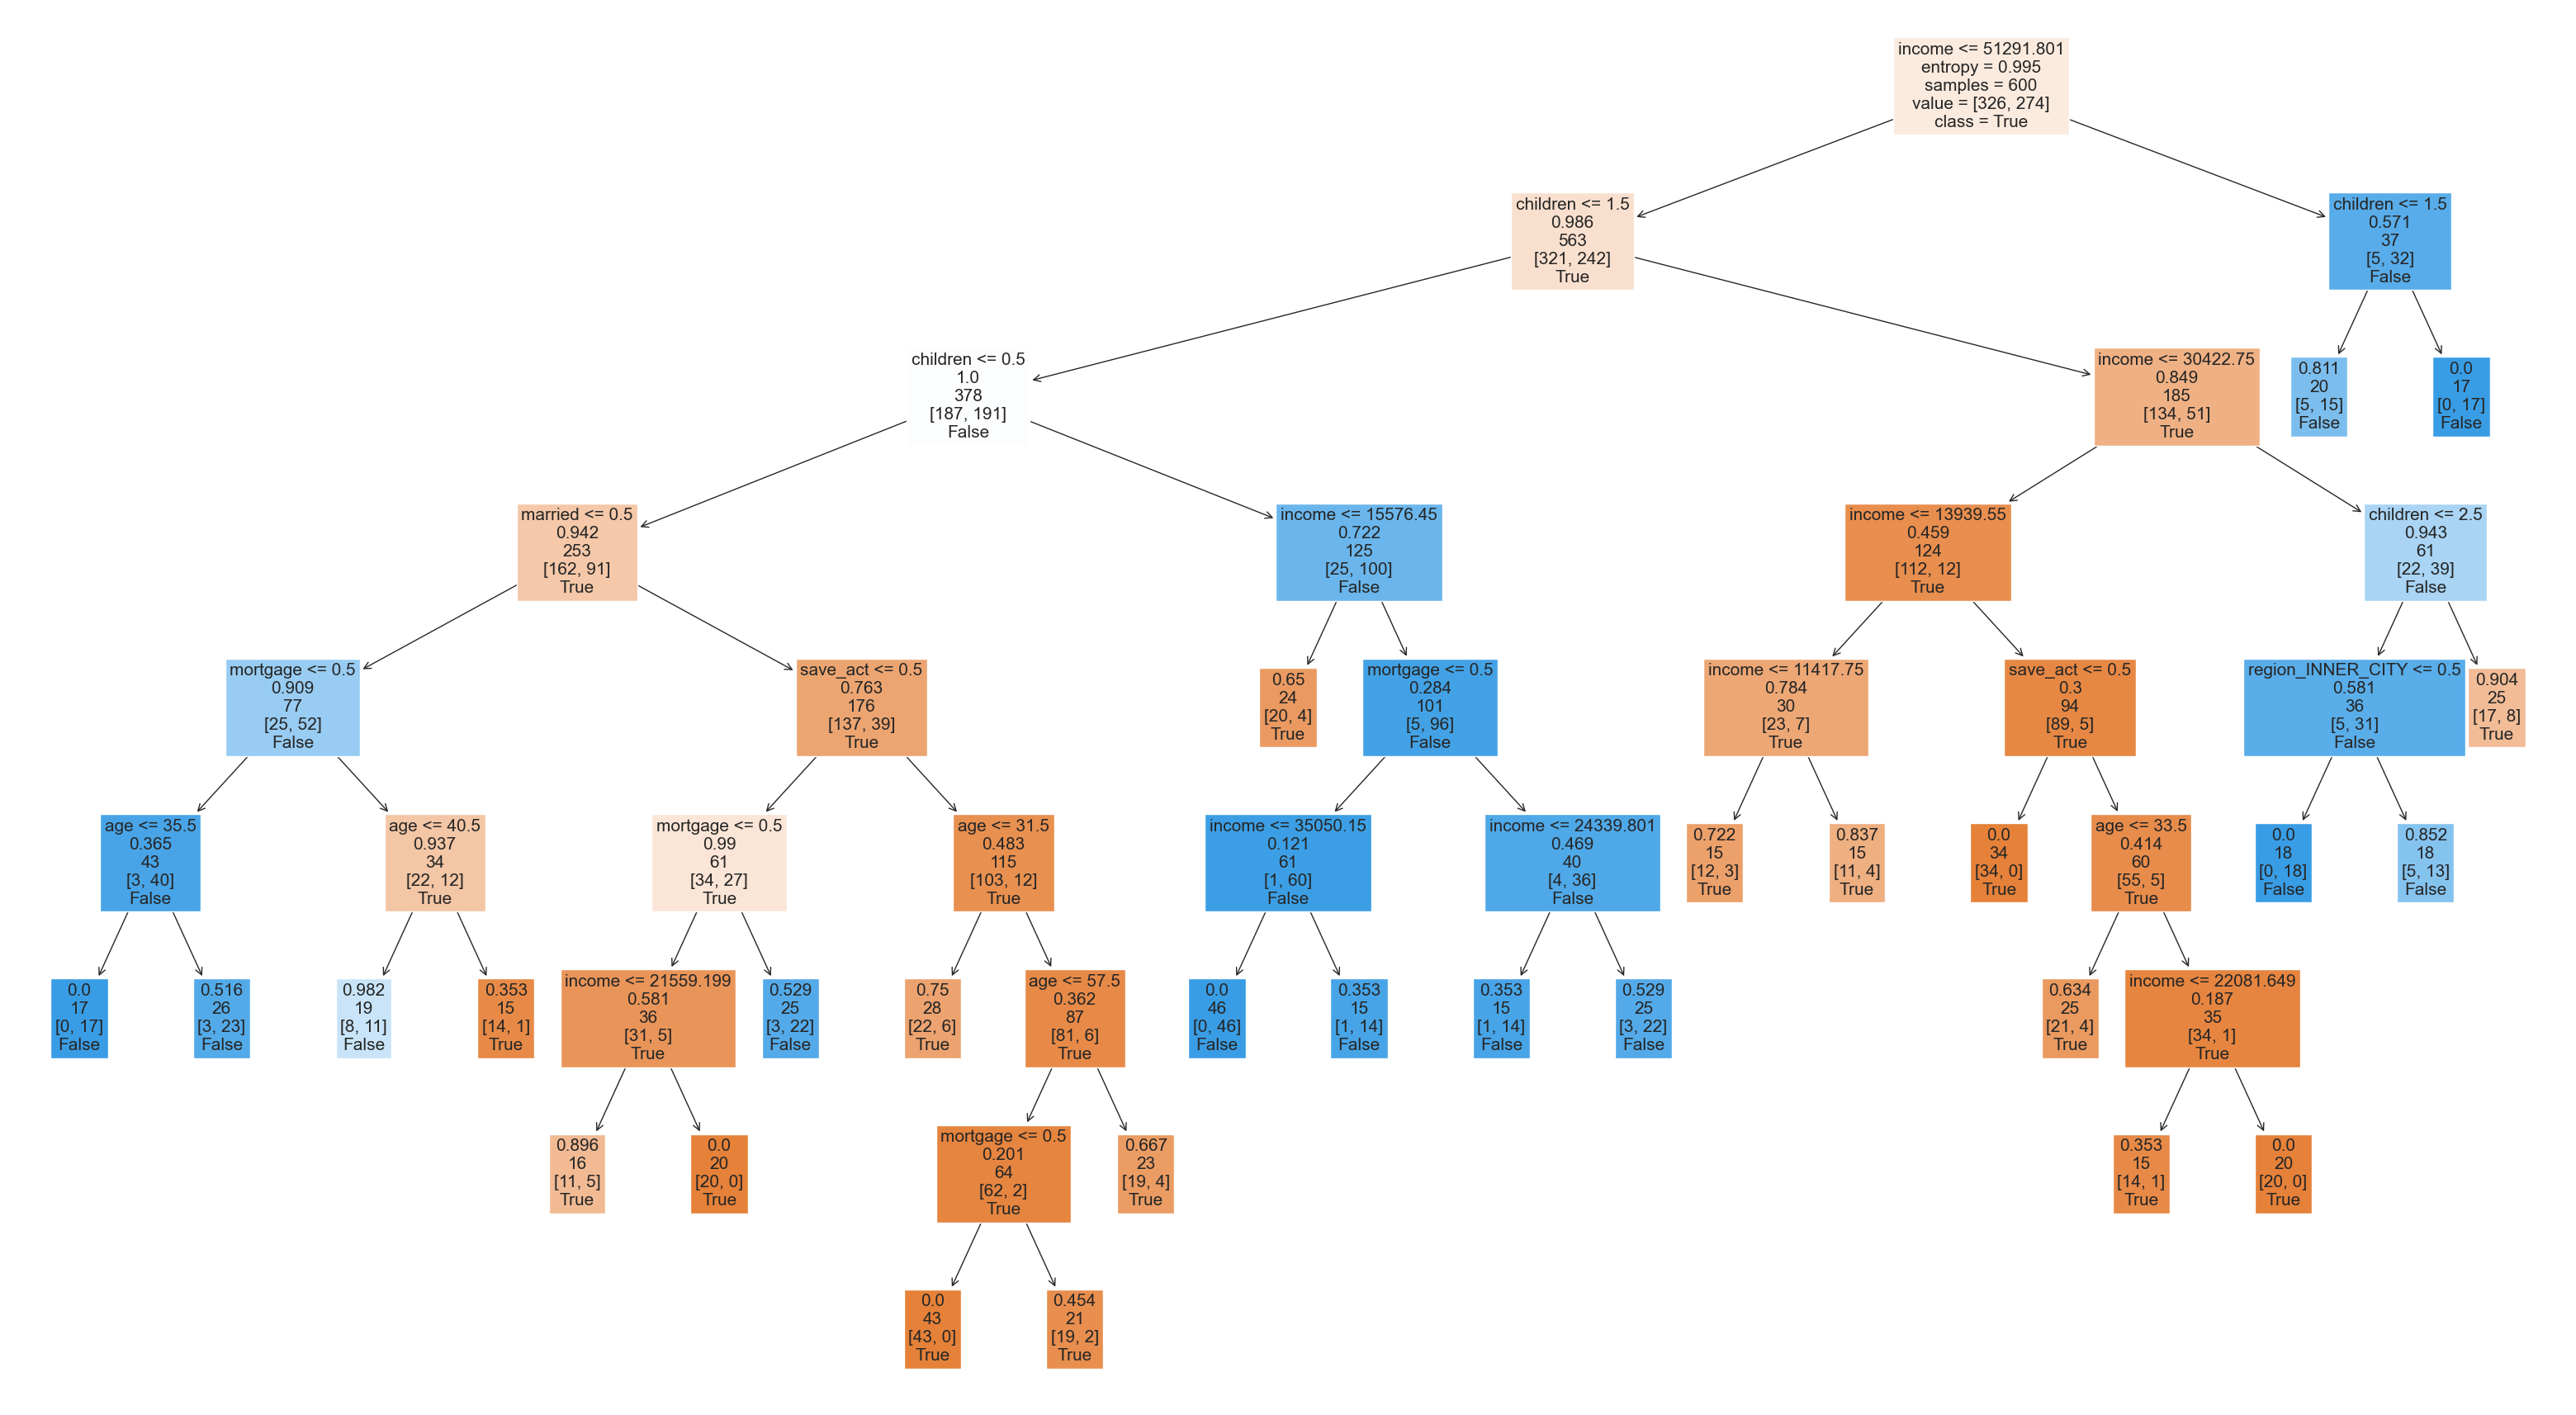


Decision Tree Classification Accuracy %: 88.1667


In [8]:
X = training_df.drop(columns=['pep'])
y = training_df.pep

# Above, we define the features (X) and target variable (Y) for the model.
# X contains all columns of the training_df dataframe except for the pep column. These will
# all be used to train the model. Later on, it may be good to remove other variables if deemed necessary.
# Y contains the values of the pep column from the training_df dataframe only. This is the target variable
# we are aiming to predict.

clf = DecisionTreeClassifier(min_samples_leaf = 15, random_state = 3, criterion = 'entropy')
# We call the decision tree classifier with tree.DecisionTreeClassifier. We have NOT fit the model yet.
# We are only setting hyperparameters for the tree first.

# min_sample_leaves = 15 means that each leaf/end node must have at least 15 samples.
# criterion = 'entropy' means that the tree will use the entropy method to make decisions for splits in order
# to maximize information gain.

# Setting the random_state to a fixed number ensures that the results you obtain from running the models will be consistent across different runs.

# You can also add a max_depth hyperparameter to limit the depth of the tree.

model = clf.fit(X,y) # Now, we train the decision tree classifier on our X and Y data and store the results.

plt.figure(figsize = (40, 22), dpi = 100) # change dpi for size of image
plot_tree(model, fontsize = 15, feature_names = X.columns.tolist(), impurity = True,class_names = ["True", "False"], label = 'root', filled = True)
plt.show()
print('\nDecision Tree Classification Accuracy %:', round(clf.score(X, y) * 100,4))

# The code above displays the tree itself with custom settings for the plot, including figure size and dpi.
# The tree is specifically plotted with plot_tree() where you provide the model feature names as
# the columns in X, whether you want the impurity/entropy to be shown on each node, labels for the
# target classes (showing which class a node belongs to or leans toward), how node labels are displayed,
# and how the tree should be colored based on the majority class they represent.

# Finally, we evaluate the accuracy of the trained model using the same training data by calling the
# .score method, which computes the accuracy as a proportion of correctly predicted classifications
# in the dataset.

Any takeaways from this tree?

# Create Model - Logistic Regression

Our objective here is to create a [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model using the training data (X and Y) instantiated earlier and evaluate its accuracy.

Compared to the previously shown decision tree classifier, logistic regression offers a different approach to classification. While the decision tree works by making sequential decisions based on feature values to classify data, logistic regression models the probability that each input point belongs to a particular category.

In [9]:
# Now, we create and train the logistic regression model. We can instantiate and fit the data in the
# same line of code and store the results
clfr = LogisticRegression(random_state = 3).fit(X, y)

# Here, we have the mean accuracy of the logistic regression model; this is essentially our training accuracy.
print('Logistic Regression Classification Accuracy %:', round(clfr.score(X, y) * 100,4))

Logistic Regression Classification Accuracy %: 58.1667


In [10]:
print('Logistic Regression Classification Accuracy %:',round(float(accuracy_score(clfr.predict(X), y)) * 100,4))

# This is a slightly different approach. Here, predict(X) uses the trained logistic regression model
# clfr to make predictions on the dataset 'X', which returns an array of predicted outcomes.
# Then, accuracy score is a fucntion that computes the accuracy classifaction score, and the accuracy
# is calculated by comparing the model's predictions to the true outcomes, 'y'.
# It then returns the accuracy as a float in the range of 0 to 1 where 1 represents 100% to 4 decimal places.

# Compared to the previous approach, this method explicly predicts outcomes using clfr.predict(X) and then
# uses 'accuracy_score' to compare these predictions with the true outcomes. Meanwhile, the previous
# method is direct and computes the mean accuracy of the model on the given data.
# It internally makes predictions using the model and then compares those predictions
# with the true outcomes.

# Both yield the same score, but this method is a bit more explicit.

Logistic Regression Classification Accuracy %: 58.1667


Any takeaways from the logistic regrssion model?

# Decision Tree Exercise

In the below code, we are going back to a decision tree model, but we also are dropping the income attribute as a predictor. By dropping this column, we can see how the model performs without considering income as a feature.

In [21]:
x1

,age,income,married,children,car,save_act,current_act,mortgage,sex_FEMALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN
0,48.0,17546.00,False,1.0,False,False,False,False,1,1,0,0,0
1,40.0,30085.10,True,3.0,True,False,True,True,0,0,0,0,1
2,51.0,16575.40,True,0.0,True,True,True,False,1,1,0,0,0
3,23.0,20375.40,True,3.0,False,False,True,False,1,0,0,0,1
4,57.0,50576.30,True,0.0,False,True,False,False,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61.0,47025.00,False,2.0,True,True,True,True,1,1,0,0,0
596,30.0,9672.25,True,0.0,True,True,True,False,1,1,0,0,0
597,31.0,15976.30,True,0.0,True,True,False,False,1,0,0,0,1
598,29.0,14711.80,True,0.0,False,True,False,True,0,1,0,0,0


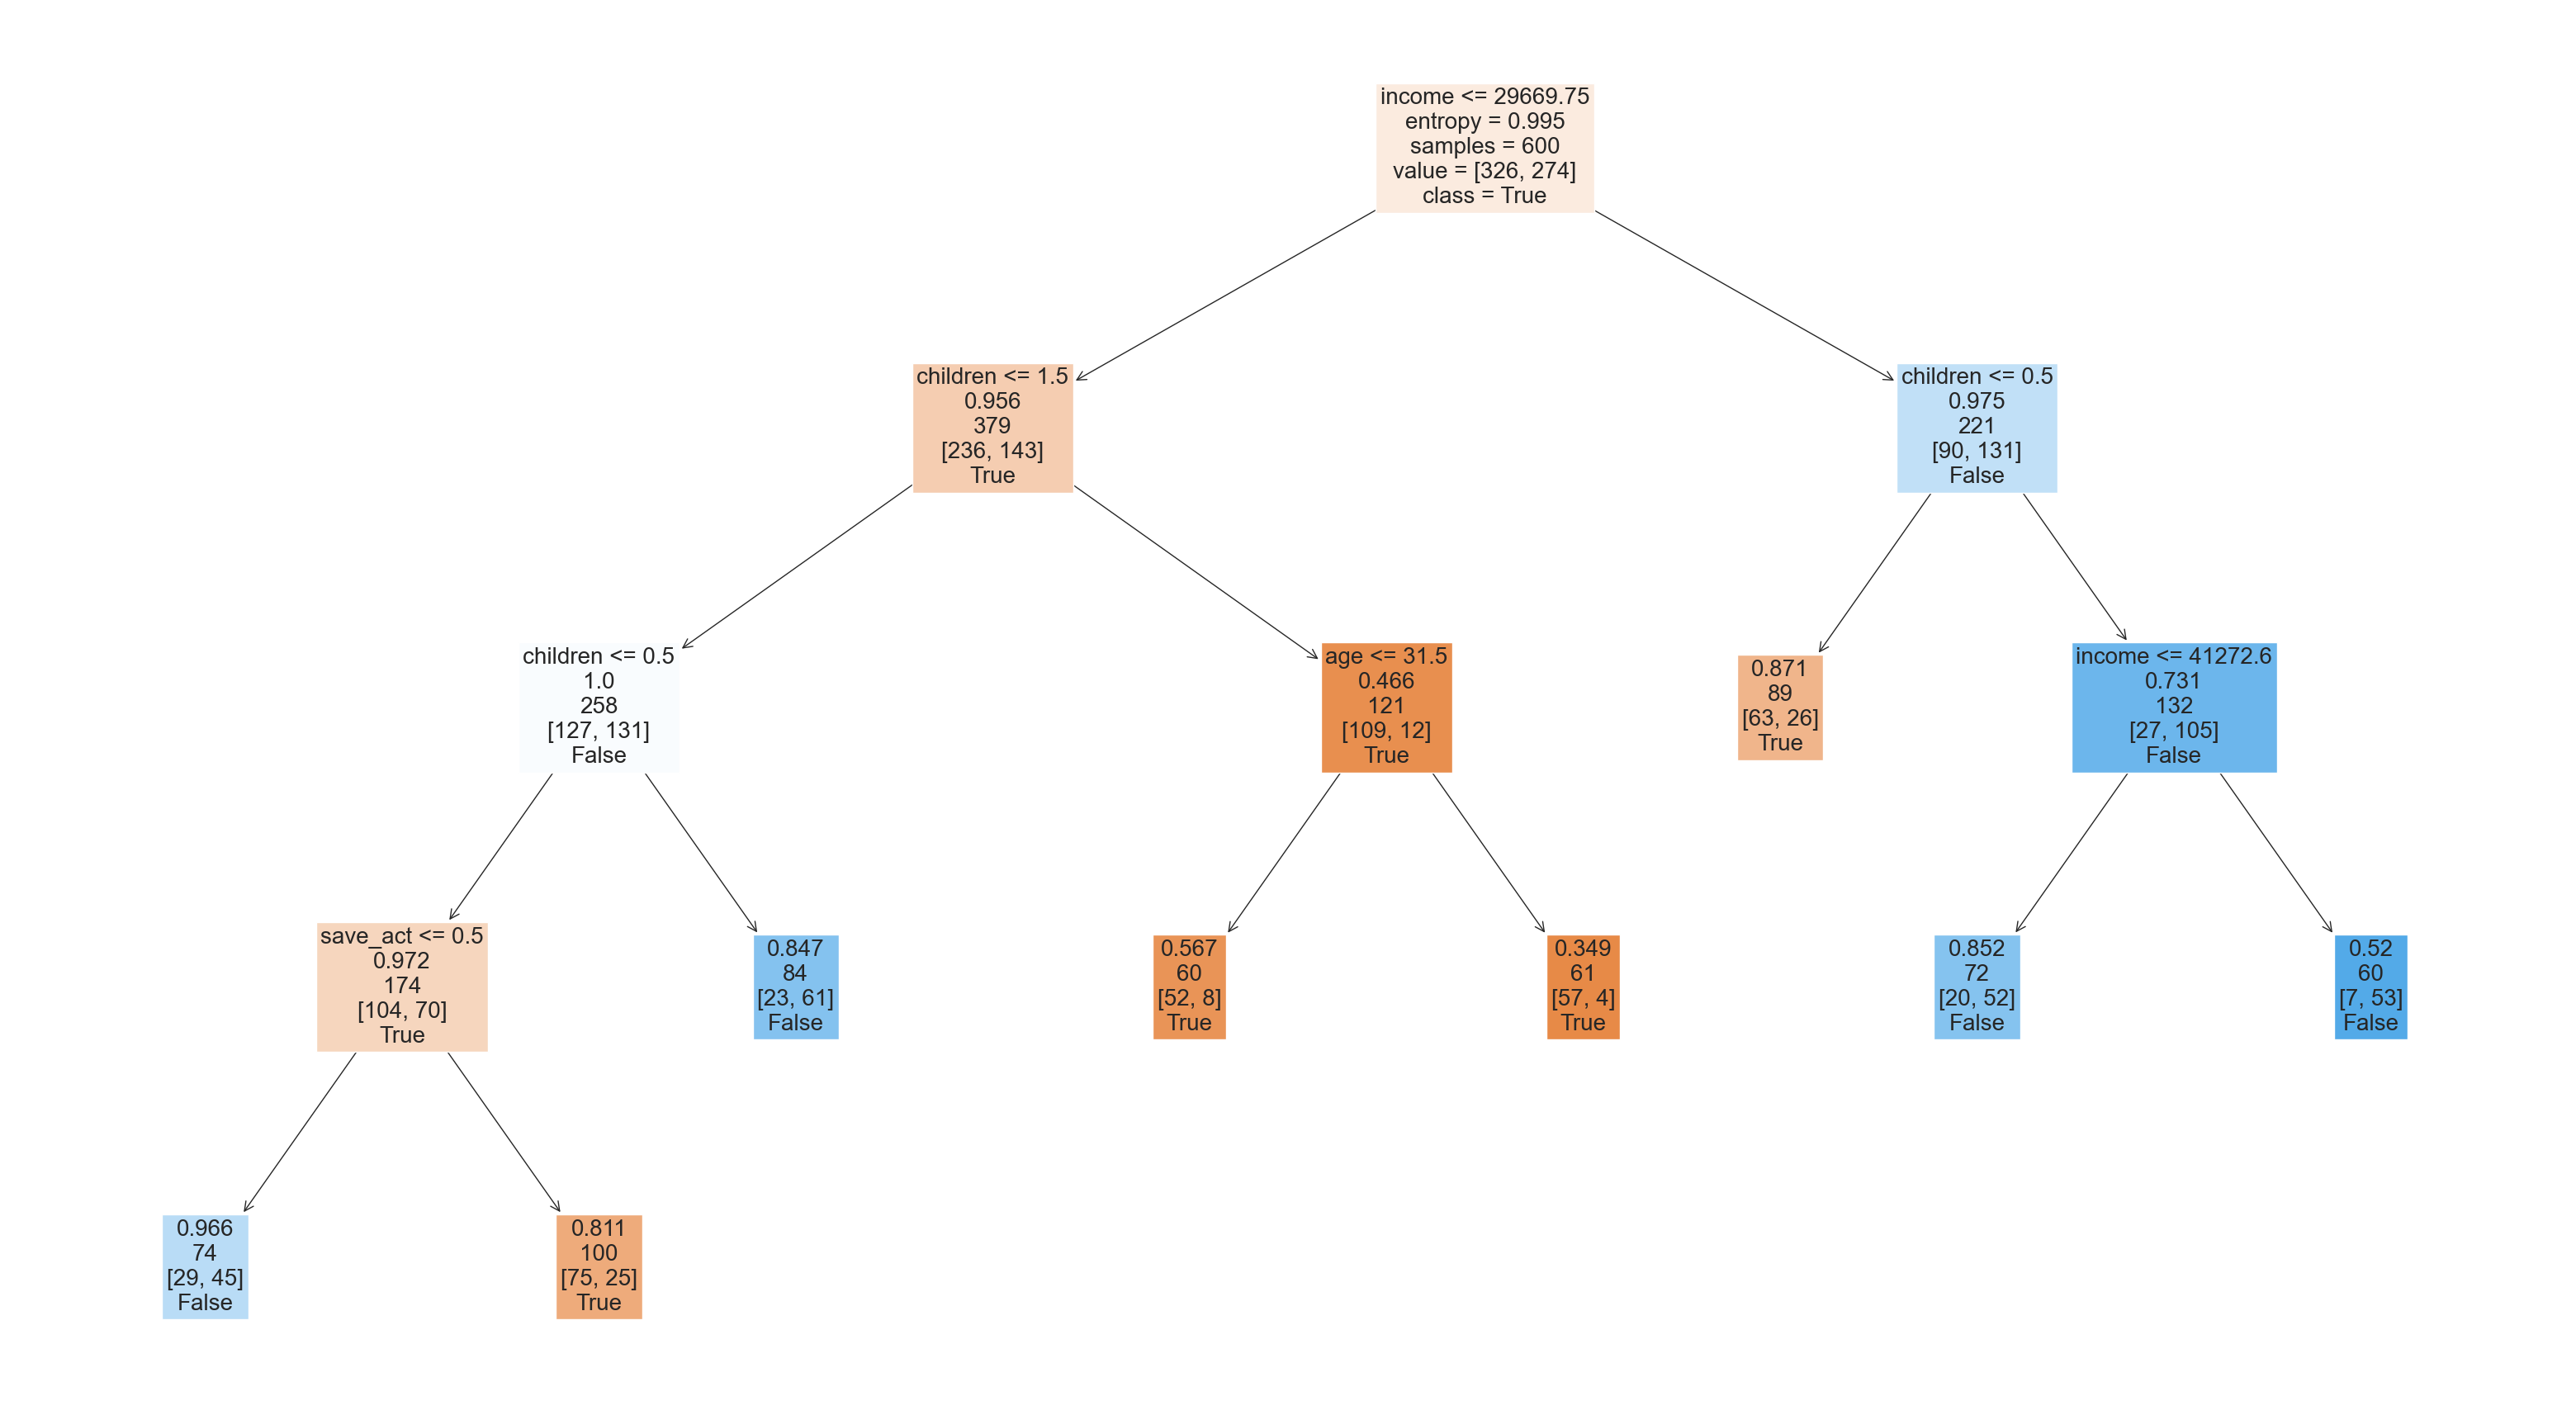


Decision Tree Accuracy %: 76.3333


In [28]:
x1 = X

clf = DecisionTreeClassifier(min_samples_leaf = 60, random_state = 3, criterion = 'entropy')

model = clf.fit(x1,y)

plt.figure(figsize = (40, 22), dpi = 100) # change dpi for size of image
plot_tree(model, fontsize = 20, feature_names = x1.columns.tolist(), impurity = True,class_names = ["True", "False"], label = 'root', filled = True)
plt.show()
print('\nDecision Tree Accuracy %:', round(clf.score(x1, y) * 100,4))

# This will probably take a while to run. What is wrong with this tree?

Any takeaways from this tree?